<a href="https://colab.research.google.com/github/ishika-s/LGMVIP-DataScience/blob/main/LGM_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as pdr
import pandas as pd

# Reading the data
url="https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
df=pd.read_csv(url)
print("Data to be Analyzed:-")

df.tail()



Data to be Analyzed:-


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
import pandas_datareader as pdr
import pandas as pd




# Reading the data
url="https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
df=pd.read_csv(url)


#doing prediction by considering the closed clolumn

df1=df.reset_index()['Close']
df1.shape





(2035,)

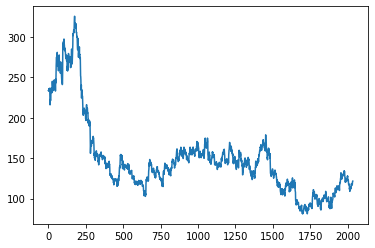

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape

(2035, 1)

In [ ]:
print(df1)


[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [ ]:
#splitting data into test and training dataset
trainingdataset_size=int(len(df1)*0.65)
testdataset_size=len(df1)-trainingdataset_size
training_data,test_data=df1[0:trainingdataset_size,:],df1[trainingdataset_size:len(df1),:1]
trainingdataset_size,testdataset_size

(1322, 713)

In [ ]:
import numpy
#converting array to matrix

def create_dataset(dataset,time=1):
    datax, datay = [],[]
    for i in range(len(dataset)-time-1):
        a=dataset[i:(i+time),0]
        datax.append(a)
        datay.append(dataset[i+time,0])
    return numpy.array(datax),numpy.array(datay)
time=100
X_train, y_train=create_dataset(training_data,time)
X_test, y_test=create_dataset(test_data,time)
print(X_train)
print(X_test.shape),print(y_test.shape)


[[0.62418301 0.62214052 0.62622549 ... 0.83455882 0.86213235 0.85273693]
 [0.62214052 0.62622549 0.63378268 ... 0.86213235 0.85273693 0.87111928]
 [0.62622549 0.63378268 0.62234477 ... 0.85273693 0.87111928 0.84497549]
 ...
 [0.34517974 0.31781046 0.33047386 ... 0.2816585  0.27001634 0.26531863]
 [0.31781046 0.33047386 0.32128268 ... 0.27001634 0.26531863 0.27389706]
 [0.33047386 0.32128268 0.34007353 ... 0.26531863 0.27389706 0.25347222]]
(612, 100)
(612,)


(None, None)

In [ ]:
#reshaping
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
#creating the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 10s 244ms/step - loss: 0.0268 - val_loss: 0.0068
Epoch 2/100
20/20 [==============================] - 4s 183ms/step - loss: 0.0044 - val_loss: 0.0016
Epoch 3/100
20/20 [==============================] - 4s 183ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 4/100
20/20 [==============================] - 4s 185ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 5/100
20/20 [==============================] - 4s 180ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 6/100
20/20 [==============================] - 4s 189ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 7/100
20/20 [==============================] - 4s 185ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 8/100
20/20 [==============================] - 4s 181ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 9/100
20/20 [==============================] - 4s 183ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 10/100
20/20 [==============================] - 4s 182ms/step - loss: 0.0011 - val_l

In [ ]:
import tensorflow as trf
trf.__version__

'2.5.0'

In [ ]:
#Doing the prediction on the given data

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
#transformation
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

#calculating the rmse performance matrix

import math as mth
from sklearn.metrics import mean_squared_error
mth.sqrt(mean_squared_error(y_train,train_predict))


165.25868468909968

In [ ]:
mth.sqrt(mean_squared_error(y_test,test_predict))

115.26846503105324

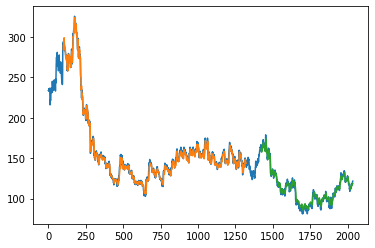

In [ ]:
# Plotting the prediction

look=100
#shifting prediction for plotting
trainpredictplot=numpy.empty_like(df1)
trainpredictplot[:,:]=np.nan
trainpredictplot[look:len(train_predict)+look,:] = train_predict
testpredictplot=numpy.empty_like(df1)
testpredictplot[:,:]=numpy.nan
testpredictplot[len(train_predict)+(look*2)+1:len(df1)-1,:] = test_predict
#plotting baseline
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

In [ ]:
len(test_data)

713

In [ ]:
X_input=test_data[613:].reshape(1,-1)
X_input.shape

(1, 100)

In [ ]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()
temp_input

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

In [ ]:
from numpy import array

list_ot=[]
steps=100
i=0
while(i<30):
  if(len(temp_input)>100):
    X_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,X_input))
    X_input=X_input.reshape(1,-1)
    X_input=X_input.reshape((1,steps,1))
    yhat=model.predict(X_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    list_ot.extend(yhat.tolist())
    i=i+1
  else:
    X_input=X_input.reshape((1,steps,1))
    yhat=model.predict(X_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    list_ot.extend(yhat.tolist())
    i=i+1

print(list_ot)

0 day input [0.1419576  0.1419576  0.14195758 0.14195758 0.14195758 0.14195758
 0.14195758 0.14195758 0.14195758 0.14195758 0.14195758 0.1419576
 0.1419576  0.14195758 0.1419576  0.1419576  0.1419576  0.14195758
 0.14195757 0.14195758 0.14195758 0.14195758 0.14195758 0.14195758
 0.1419576  0.1419576  0.14195758 0.14195758 0.14195758 0.1419576
 0.1419576  0.14195758 0.1419576  0.1419576  0.1419576  0.1419576
 0.1419576  0.1419576  0.14195758 0.1419576  0.14195758 0.1419576
 0.1419576  0.14195758 0.1419576  0.14195758 0.1419576  0.14195758
 0.1419576  0.1419576  0.14195758 0.1419576  0.1419576  0.1419576
 0.14195758 0.14195758 0.14195758 0.14195758 0.14195758 0.1419576
 0.14195758 0.14195758 0.14195758 0.1419576  0.1419576  0.1419576
 0.1419576  0.14195758 0.14195758 0.14195758 0.14195758 0.14195758
 0.1419576  0.14195758 0.1419576  0.1419576  0.1419576  0.1419576
 0.1419576  0.1419576  0.1419576  0.1419576  0.1419576  0.1419576
 0.1419576  0.1419576  0.1419576  0.1419576  0.1419576  0.1

In [ ]:
len(df1)

2035

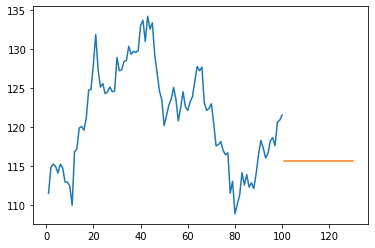

In [ ]:
newday=np.arange(1,101)
daypred=np.arange(101,131)
import matplotlib.pyplot as plt

dfn=df1.tolist()
dfn.extend(list_ot)
plt.plot(newday,scaler.inverse_transform(df1[1935:]))
plt.plot(daypred,scaler.inverse_transform(list_ot))

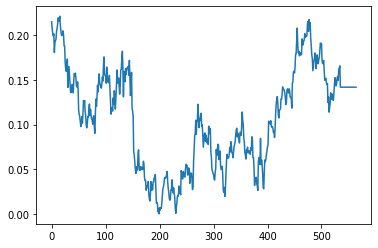

In [ ]:
dfn=df1.tolist()
dfn.extend(list_ot)
plt.plot(dfn[1500:])